# K-means Clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [5]:
x.shape

(1000, 2)

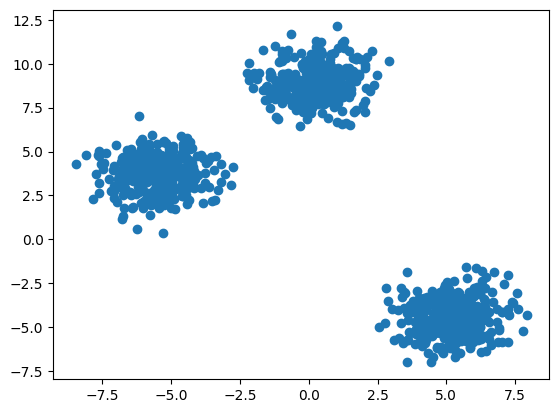

In [8]:
plt.scatter(x[:,0],x[:,1])  

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23)

In [11]:
from sklearn.cluster import KMeans

In [13]:
#manual Process
#Elbow Method to select the k value

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[35763.356599619765,
 8297.202114173544,
 1394.6687381999259,
 1220.9930472808417,
 1078.8694356790265,
 928.152994185234,
 944.5619724715574,
 719.0908918802559,
 619.2486427485414,
 646.8096643635026]

([<matplotlib.axis.XTick at 0x1693867fed0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

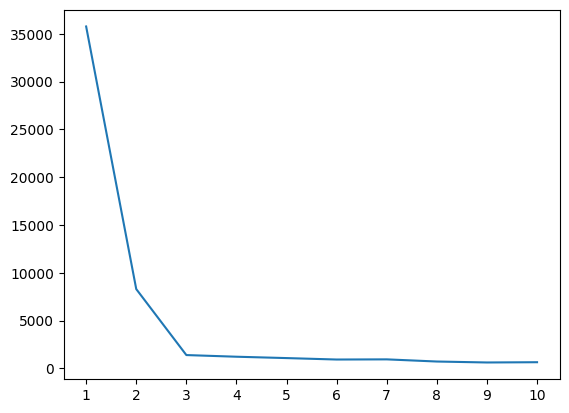

In [15]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

In [16]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [18]:
y_label = kmeans.fit_predict(x_train)

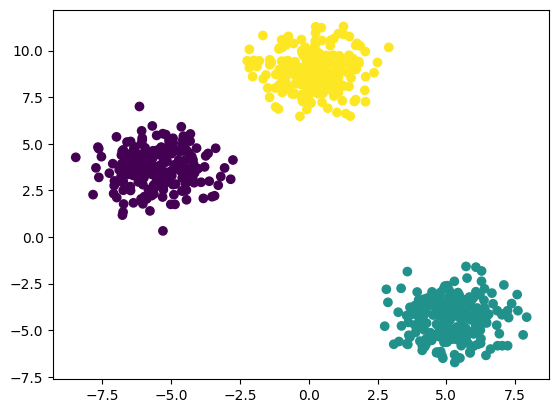

In [19]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_label)

In [21]:
y_test_label = kmeans.predict(x_test)

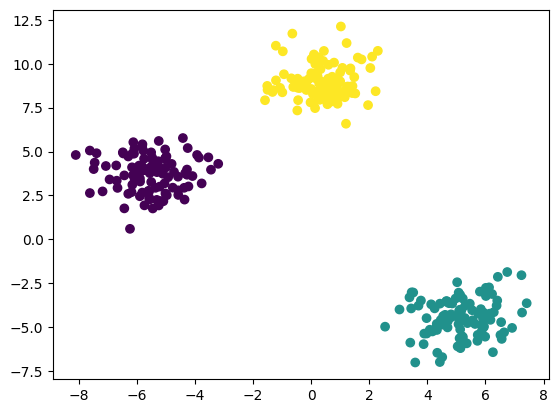

In [22]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_label)

In [24]:
#Knee Locator

In [25]:
pip install kneed


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from kneed import KneeLocator

In [27]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

In [28]:
## Performance metrices
## Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_score(x_train,kmeans.labels_)


np.float64(0.8027214370116031)

In [30]:
silhoutte_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    score = silhouette_score(x_train,kmeans.labels_)
    silhoutte_coefficients.append(score)

In [32]:
#Higher the value of Silhouette Score, better the model
silhoutte_coefficients

[np.float64(0.7252547694122655),
 np.float64(0.8027214370116031),
 np.float64(0.6440624549854512),
 np.float64(0.46383532590924365),
 np.float64(0.4817084492320673),
 np.float64(0.4758075051230352),
 np.float64(0.33366252800761004),
 np.float64(0.34870669391723247),
 np.float64(0.338398040986788)]

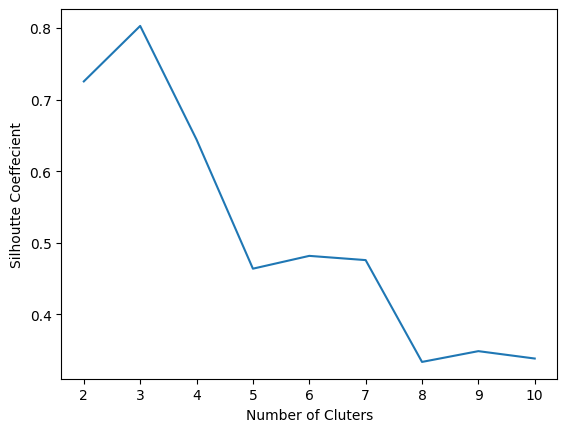

In [34]:
## plotting silhouette score
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()